In [1]:
#Librairy 
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix, fowlkes_mallows_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mode 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 



# 1. k-means on digits

Use K-means clustering on the MNIST dataset (which can be imported with `from sklearn.datasets import load_digits`) to learn to identify the 10 digits in an unsupervised manner.

1. Plot the `cluster_centers_` from a kmeans clustering (which should be shape `(10,64)`) onto a `8x8` grid (hint: use `kmeans.cluster_centers_.reshape`)

2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label (eg. if the digit 4 has the cluster label 9, you want to remap it to 4). Hint: You can use the statistical mode of your clusters and the real label to match them

3. Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.

4. Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.

In [13]:
# 1. Plot the cluster_centers_ from a kmeans clustering (which should be shape (10,64)) onto a 8x8 grid (hint: use kmeans.cluster_centers_.reshape)
#Load the data 
digits = load_digits()
digits.data.shape

X = digits.data
y = digits.target

N_CLUSTERS = 10 

kmeans = KMeans(n_clusters=N_CLUSTERS, n_init=100, random_state=42).fit(X)
centers = kmeans.cluster_centers_.reshape(10,8,8)

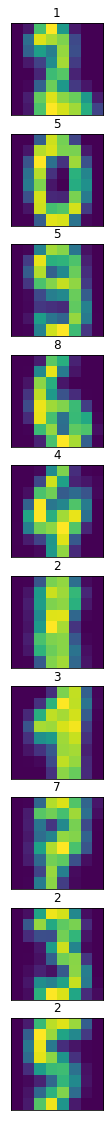

In [20]:


fig, ax = plt.subplots(10, figsize = (20, 20))
for i in range(len(centers)):
    ax[i].imshow(centers[i])
    ax[i].set_title(kmeans.labels_[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()


In [27]:
#2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label, so map the cluster label to the true (target) label. 
from statistics import mode

predict_y = kmeans.predict(X)

labels_pred = np.zeros_like(predict_y)

for i in range(0,10):
    labels_pred[predict_y == i] = mode(digits.target[predict_y == i]) 

X.shape

(1797, 64)

In [30]:
# 3 Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.

print(accuracy_score(y, labels_pred))
confusion_matrix(y, labels_pred)

0.7918753478018921


array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  55,  24,   1,   0,   1,   2,   0,  99,   0],
       [  1,   2, 147,  13,   0,   0,   0,   4,   8,   2],
       [  0,   0,   0, 154,   0,   2,   0,   7,   7,  13],
       [  0,   7,   0,   0, 162,   0,   0,  10,   2,   0],
       [  0,   0,   0,   1,   2, 136,   1,   0,   0,  42],
       [  1,   1,   0,   0,   0,   0, 177,   0,   2,   0],
       [  0,   2,   0,   0,   0,   0,   0, 175,   2,   0],
       [  0,   6,   3,   2,   0,   4,   2,   5, 100,  52],
       [  0,  20,   0,   6,   0,   4,   0,   9,   1, 140]], dtype=int64)

In [33]:
# 4 Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.
fowlkes_mallows_score(load_digits().target, labels_pred)

0.6997609248183732

# 2: Image Compression second pass

Use any the clustering algorithms we see to produce what you think is the best image compression ratio that is **visually indistinguishable** from the original image (recall in the lecture the result was very compressed but also much uglier)

Justify your choice and process in 3 paragraphs.

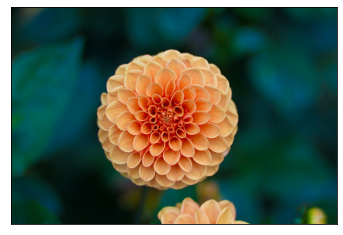

In [36]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import MiniBatchKMeans
flower = load_sample_image('flower.jpg')

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [38]:
flower.shape

data = flower / 255.0 
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [44]:
#elbow method to find the best number for k
inertias_values = []
K = [16,32,64,128,256,512,1024]
for k in K:
    k_model = MiniBatchKMeans(n_clusters=k)
    k_model.fit(data)
    inertias_values.append(k_model.inertia_)
inertias_values

[941.089013306083,
 541.4131237725151,
 335.5462469042758,
 218.3891544198571,
 194.32473300734947,
 106.38424579208291,
 62.87564526803607]

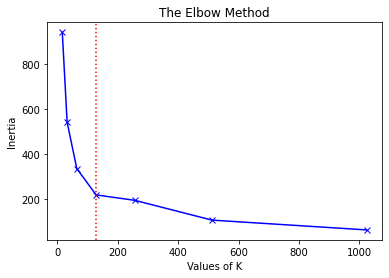

In [45]:
plt.plot(K,inertias_values,'bx-')
plt.axvline(x=128,linestyle=':',color='r')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [58]:
# Using elbow of k = 128
N_CLUSTERS = 128 #256 #64
k_model = MiniBatchKMeans(N_CLUSTERS).fit(data)
new_colors = k_model.cluster_centers_[k_model.predict(data)]

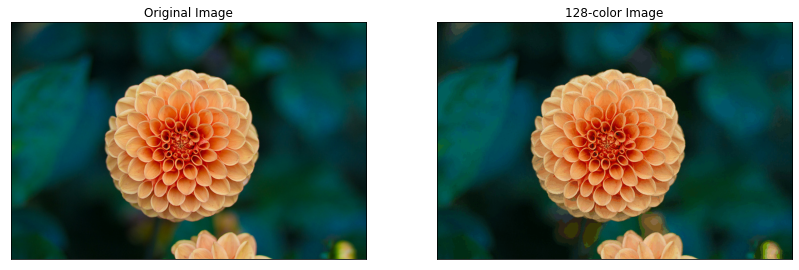

In [57]:

flower_update = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(14, 8),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=12)
ax[1].imshow(flower_update)
ax[1].set_title('128-color Image', size=12);

# 3. Clustering on Colleges

This question will use the data from `college.csv`

1. Use clustering with `k=2` on all data except whether the college is private of not. Try to match it best to the private/public college split (hint: don't forget to normalize your features!). Evaluate it in terms of classification metrics and clustering metrics.

2. Knowing what you found in `3.1`, find the best overall clustering with the k of your choice. Make an argument and a visualization of the clusters (with two relevant statistics) to demonstrate why you think your clustering is good.

In [59]:
df = pd.read_csv('data/college.csv')
df.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [60]:
df['Private'] = df.Private.replace(['Yes','No'],[1,0])

In [74]:
#1
from sklearn.preprocessing import Normalizer
from sklearn.metrics import precision_score,recall_score,accuracy_score,fowlkes_mallows_score,confusion_matrix,classification_report

#normalizer

N_CLUSTERS = 2
X = df.drop(['Private','Unnamed: 0'], axis = 1)

y = df.Private
scale = Normalizer()
X = scale.fit_transform(X)
X

array([[0.14324994, 0.10631562, 0.0622188 , ..., 0.00103554, 0.60760412,
        0.00517771],
       [0.12154126, 0.1069741 , 0.02846712, ..., 0.0008896 , 0.58529955,
        0.00311359],
       [0.09564844, 0.07347783, 0.02250551, ..., 0.00200942, 0.5850764 ,
        0.00361696],
       ...,
       [0.17014119, 0.15537453, 0.05638919, ..., 0.00162271, 0.67529097,
        0.00397564],
       [0.22712287, 0.05204413, 0.02794216, ..., 0.00103961, 0.85685047,
        0.00210044],
       [0.32515255, 0.20179257, 0.07516909, ..., 0.00304593, 0.4905028 ,
        0.01076952]])

In [75]:
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=675)
kmeans.fit(X)

pred = kmeans.predict(X)

In [91]:
#pred
print('Classification Report: \n {0}'.format(classification_report(y, pred)))
print('Accuracy Score: {0}'.format(accuracy_score(y, pred)))
print('Confusion Matrix: \n{0}'.format(confusion_matrix(y, pred)))
print('FMI: {0}'.format(fowlkes_mallows_score(y, pred)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.09      0.27      0.14       212
           1       0.10      0.03      0.05       565

    accuracy                           0.10       777
   macro avg       0.10      0.15      0.09       777
weighted avg       0.10      0.10      0.07       777

Accuracy Score: 0.09523809523809523
Confusion Matrix: 
[[ 57 155]
 [548  17]]
FMI: 0.8635220144275176


# Evaluation

In [93]:
#2
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MiniBatchKMeans

n_clusters = [2,3,4,5,6,8,10]

for c in n_clusters:
    k_model = KMeans(n_clusters=c).fit(X)
    pred = k_model.predict(X)
    print('N_Clusters: {0}, FMI: {1}'.format(c,fowlkes_mallows_score(y, pred)))


N_Clusters: 2, FMI: 0.8635220144275176
N_Clusters: 3, FMI: 0.7925308845611729
N_Clusters: 4, FMI: 0.7145207663702259
N_Clusters: 5, FMI: 0.6717856732966401
N_Clusters: 6, FMI: 0.5490666156990275
N_Clusters: 8, FMI: 0.46132800474443875
N_Clusters: 10, FMI: 0.45371152892084426


For n_clusters = 2 The average silhouette_score is : 0.585803103928166
For n_clusters = 3 The average silhouette_score is : 0.40587943308735713
For n_clusters = 4 The average silhouette_score is : 0.3351384087651876
For n_clusters = 5 The average silhouette_score is : 0.3071217207300303
For n_clusters = 6 The average silhouette_score is : 0.22154358092806095


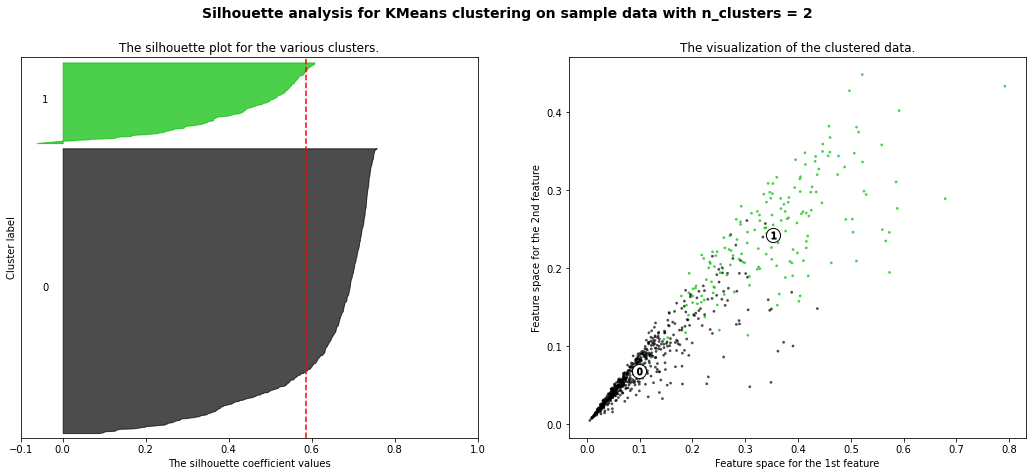

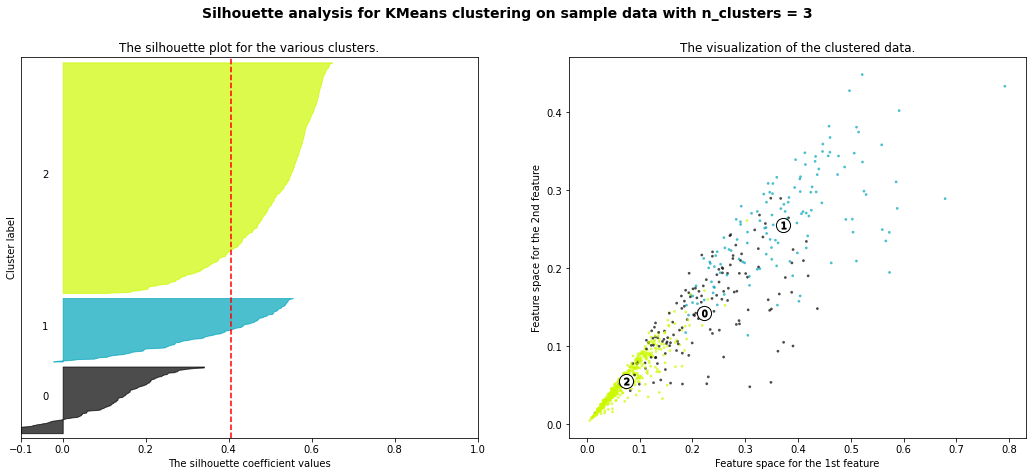

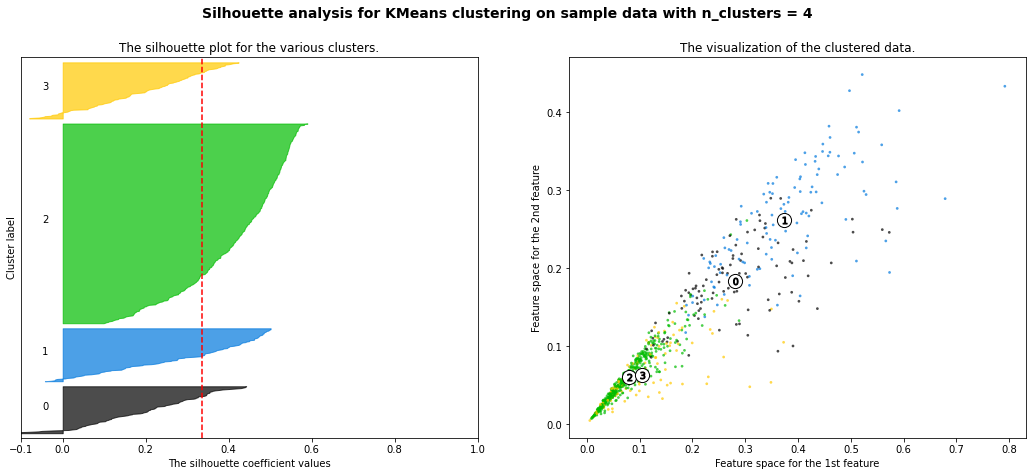

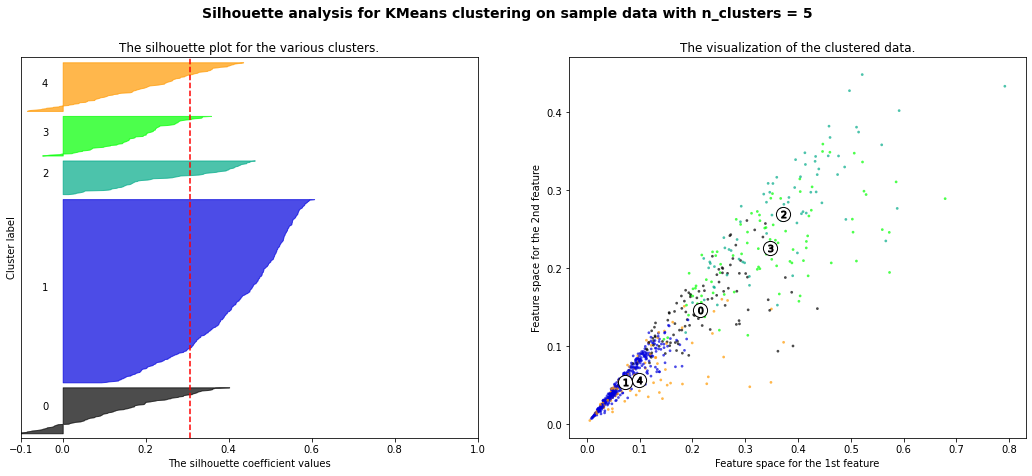

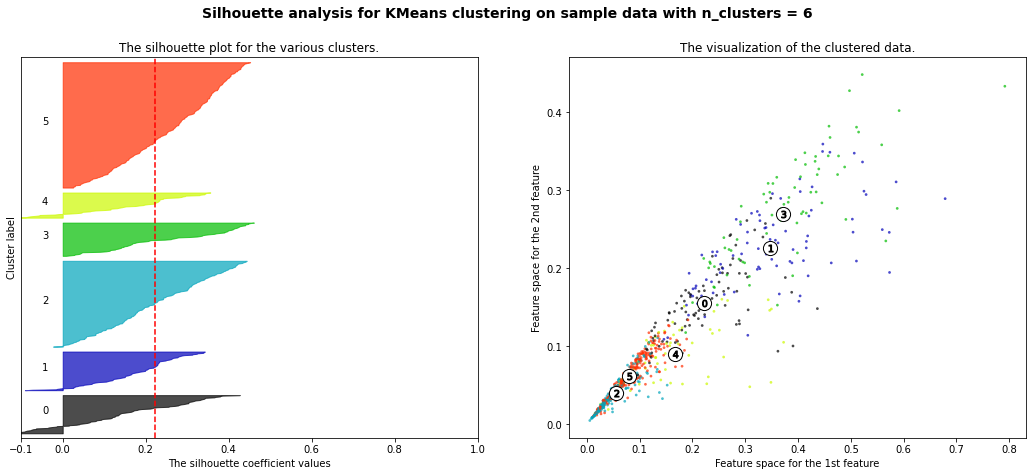

In [94]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Evaluation 